In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf

In [2]:
ad=pd.read_csv(r"C:\Users\user\OneDrive\Documents\Python\Advertising - 1741535728031.csv")

In [3]:
ad.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [18]:
model=smf.ols('Sales~TV',ad)
model=model.fit()

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.47e-42
Time:                        13:15:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [31]:
X=ad.TV
Y=ad.Sales

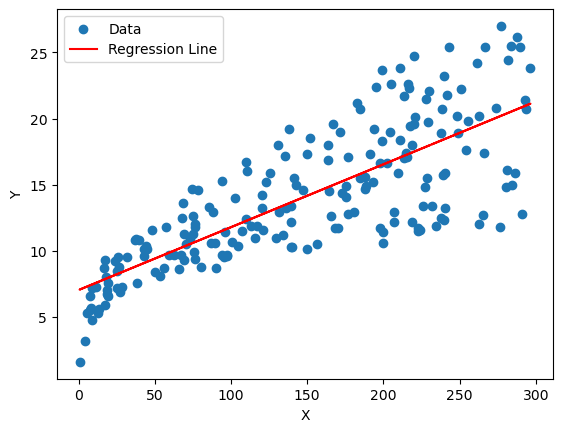

Final values standard value: B = 0.7822, C = -0.0000
Final values: B = 0.0475, C = 7.0326


In [39]:
B=0
C=0
r=0.01  #learning rate
iterations=1000
X_scaled= (X-np.mean(X))/np.std(X)
Y_scaled= (Y-np.mean(Y))/np.std(Y)
n=len(X_scaled)
for i in range(iterations):
    Y_pred=B*X_scaled+C
    error=Y_pred-Y_scaled
    dB=(2/n)*np.sum(error*X_scaled)
    dC=(2/n)*np.sum(error)
    B=B-r*dB
    C=C-r*dC
    cost=np.mean(error**2)
    #print(f"Iteration {i}: Cost={cost:.4f}, B={B:.4f}, C={C:.4f}")

B_original=(B*np.std(Y))/np.std(X)
C_original=(C*np.std(Y))+np.mean(Y)-(B_original*np.mean(X))

plt.scatter(X, Y, label='Data')
plt.plot(X, B_original * X + C_original, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f"Final values standard value: B = {B:.4f}, C = {C:.4f}")
print(f"Final values: B = {B_original:.4f}, C = {C_original:.4f}")

    



### Logistic Regression

In [28]:
np.random.seed(30)
x=np.random.rand(100,3)*[1,100,1000]
y=(np.random.rand(100)>0.5).astype(int)

In [46]:
r=0.1
it=1000
n=len(y)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = np.c_[np.ones(x_scaled.shape[0]), x_scaled]
x_new = np.zeros(x_scaled.shape[1])

def sigmoid(z):
    return 1/(1+ np.exp(-z))

#def cost_func(x,y,x_new):
    #pred=sigmoid(x @ x_new) #predictions
    #cost=(-1 / n) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    #return cost

def gradient(x,y,x_new,r,it):
    cost_history = []
    
    #cost=(-1 / n) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    for _ in range(it):
        pred=sigmoid(x @ x_new) #predictions
        cost=(-1 / n) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
        gradient = (1 / n) * (x.T @ (pred - y))
        x_new -= r*gradient
        cost_history.append(cost)
    return x_new, cost_history

x_new_optimal, cost_history = gradient(x_scaled,y,x_new,r,it)
print("optimal x", x_new_optimal)
print("Final Cost:", cost_history[-1])

optimal x [0.2579569  0.29650623 0.2878857  0.33252032]
Final Cost: 0.6553568283837494


In [47]:
X_sm = sm.add_constant(x_scaled)  # Adding intercept term
model = sm.Logit(y, X_sm)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.655357
         Iterations 5


In [48]:
print(result.params)

[0.2579569  0.29650623 0.2878857  0.33252033]


In [49]:
model=LogisticRegression(fit_intercept=True)
model.fit(x_scaled[:,1:],y)

LogisticRegression()

In [45]:
print(np.hstack(([model.intercept_], model.coef_)))

[[0.2564291  0.28256852 0.27407215 0.31718951]]


### Question 2: Standardize the ‘Customers.xlsx’ data using the Min-Max scaler and standard scaler.

In [51]:
cust=pd.read_csv(r"C:\Users\user\OneDrive\Documents\Python\Customers1.csv")

In [52]:
cust.head(5)

,Customer_ID,Customer_value,buy_times,Points_earned
0,1,798.9998,7,95
1,2,224.9000,2,90
2,3,1553.2000,2,595
3,4,538.4900,4,230
4,5,247.1301,2,123


In [54]:
data = cust[['Customer_value', 'buy_times', 'Points_earned']].values


In [74]:
# Standard Scaling 
scaler=StandardScaler()
data_sc=scaler.fit_transform(data)

In [75]:
df_stand= pd.DataFrame(data_sc, columns=['Customer_value', 'buy_times', 'Points_earned'])

In [77]:
df_stand.mean()

Customer_value   -1.221245e-17
buy_times        -7.216450e-17
Points_earned    -4.996004e-17
dtype: float64

In [78]:
df_stand.std()

Customer_value    1.005038
buy_times         1.005038
Points_earned     1.005038
dtype: float64

In [68]:
# Min-Max Scaling
scaler=MinMaxScaler()
data_m=scaler.fit_transform(data)

In [69]:
df_minmax= pd.DataFrame(data_m, columns=['Customer_value', 'buy_times', 'Points_earned'])

In [70]:
df_minmax.min()

Customer_value    0.0
buy_times         0.0
Points_earned     0.0
dtype: float64

In [71]:
df_minmax.max()

Customer_value    1.0
buy_times         1.0
Points_earned     1.0
dtype: float64